In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"   # run this BEFORE importing torch (then restart kernel if needed)

import torch
from deeptime.decomposition.deep import TVAE, TVAEEncoder
from deeptime.util.torch import MLP

device = torch.device("cuda")

ckpt = torch.load("/home/ujjwal/26jan/tvae_model.pt", map_location=device)
units = ckpt["units"]

encoder = TVAEEncoder(units, nonlinearity=torch.nn.ELU, initial_batchnorm=False).to(device)
decoder = MLP(units[::-1], nonlinearity=torch.nn.ELU, initial_batchnorm=True).to(device)

encoder.load_state_dict(ckpt["encoder_state_dict"])
decoder.load_state_dict(ckpt["decoder_state_dict"])

tae = TVAE(encoder, decoder, learning_rate=ckpt["learning_rate"], device=device, beta=ckpt["beta"])
tae_model = tae.fetch_model()

print("tae_model ready")


tae_model ready


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

train = np.load("/home/ujjwal/26jan/SOAP_all_together.npy", mmap_mode="r")

stride = 5   # IMPORTANT: use the SAME stride you used while training
train_s = train[::stride].astype(np.float32, copy=False)

scaler = MinMaxScaler()
scaler.fit(train_s)

joblib.dump(scaler, "/home/ujjwal/26jan/scaler.bin")
print("Saved scaler to /home/ujjwal/26jan/scaler.bin")


Saved scaler to /home/ujjwal/26jan/scaler.bin


In [3]:
import numpy as np
import joblib

data = np.load("/home/ujjwal/26jan/SOAP_all_together.npy", mmap_mode="r")

stride = 100  # use SAME stride as training
data_s = data[::stride].astype(np.float32, copy=False)

scaler = joblib.load("/home/ujjwal/26jan/scaler.bin")
scaled = scaler.transform(data_s).astype(np.float32, copy=False)

print("scaled shape:", scaled.shape)



scaled shape: (46400, 324)


In [4]:
import numpy as np

al2cu = np.load("min0K_relaxed_Al2Cu_DL030.dump.npy")
test_proj_al2cu = tae_model.transform(scaler.transform(np.concatenate(al2cu)))
fcc = np.load("min0K_relaxed_FCC_DL030.dump.npy")
test_proj_fcc = tae_model.transform(scaler.transform(np.concatenate(fcc)))
ni3p = np.load("min0K_relaxed_Ni3P_DL030.dump.npy")
test_proj_ni3p = tae_model.transform(scaler.transform(np.concatenate(ni3p)))


Text(0, 0.5, '$\\mu_2$')

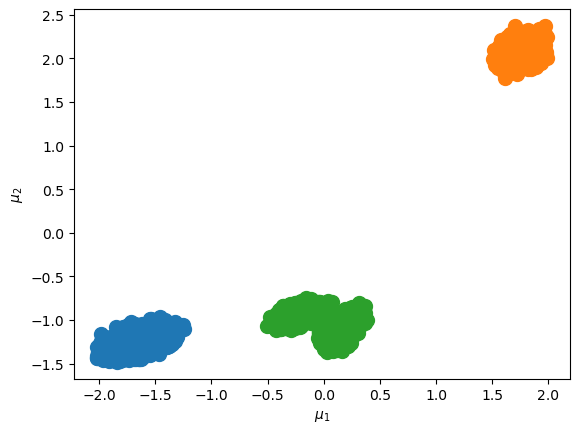

In [5]:
import matplotlib.pyplot as plt

proj = tae_model.transform(scaled)
# fig, ax = plt.subplots(figsize=(8, 6))
#plt.scatter(proj[:, 0][::1], proj[:, 1][::1],s = 0.01)
plt.scatter(test_proj_al2cu[:, 0], test_proj_al2cu[:, 1], s=100, alpha=1.0)
plt.scatter(test_proj_fcc[:, 0], test_proj_fcc[:, 1], s=100, alpha=1.0)
plt.scatter(test_proj_ni3p[:, 0], test_proj_ni3p[:, 1], s=100, alpha=1.0)
plt.xlabel(r"$\mu_1$")
plt.ylabel(r"$\mu_2$")

In [6]:
d100 = np.load("dump100_T_0.45.atom.npy")
print("d100 shape:", d100.shape)

d100_cat = np.concatenate(d100)
print("after concatenate shape:", d100_cat.shape)


d100 shape: (100, 16000, 324)
after concatenate shape: (1600000, 324)


In [7]:
d100_cat = np.concatenate(d100)[:16000]   # shape (16000, 324)
print(d100_cat.shape)

test_proj_d100 = tae_model.transform(scaler.transform(d100_cat))


(16000, 324)


In [8]:
import numpy as np

al2cu = np.load("min0K_relaxed_Al2Cu_DL030.dump.npy")
test_proj_al2cu = tae_model.transform(scaler.transform(np.concatenate(al2cu)))
fcc = np.load("min0K_relaxed_FCC_DL030.dump.npy")
test_proj_fcc = tae_model.transform(scaler.transform(np.concatenate(fcc)))
ni3p = np.load("min0K_relaxed_Ni3P_DL030.dump.npy")
test_proj_ni3p = tae_model.transform(scaler.transform(np.concatenate(ni3p)))

# New structures
fe3c  = np.load("min0K_relaxed_Fe3C_DL030.dump.npy")
test_proj_fe3c  = tae_model.transform(scaler.transform(np.concatenate(fe3c)))

pubr3 = np.load("min0K_relaxed_PuBr3_DL030.dump.npy")
test_proj_pubr3 = tae_model.transform(scaler.transform(np.concatenate(pubr3)))

cscl  = np.load("pure_cscl_DL030.dump.npy")
test_proj_cscl  = tae_model.transform(scaler.transform(np.concatenate(cscl)))

# T=0.45 dumps (use only first 16000 rows after flattening)

d100  = np.load("dump100_T_0.45.atom.npy")
x100  = np.concatenate(d100)[:16000]
test_proj_d100  = tae_model.transform(scaler.transform(x100))

d5050 = np.load("dump5050_T_0.45.atom.npy")
x5050 = np.concatenate(d5050)[:16000]
test_proj_d5050 = tae_model.transform(scaler.transform(x5050))

d6040 = np.load("dump6040_T_0.45.atom.npy")
x6040 = np.concatenate(d6040)[:16000]
test_proj_d6040 = tae_model.transform(scaler.transform(x6040))

d7030 = np.load("dump7030_T_0.45.atom.npy")
x7030 = np.concatenate(d7030)[:16000]
test_proj_d7030 = tae_model.transform(scaler.transform(x7030))

d8020 = np.load("dump8020_T_0.45.atom.npy")
x8020 = np.concatenate(d8020)[:16000]
test_proj_d8020 = tae_model.transform(scaler.transform(x8020))

d9010 = np.load("dump9010_T_0.45.atom.npy")
x9010 = np.concatenate(d9010)[:16000]
test_proj_d9010 = tae_model.transform(scaler.transform(x9010))




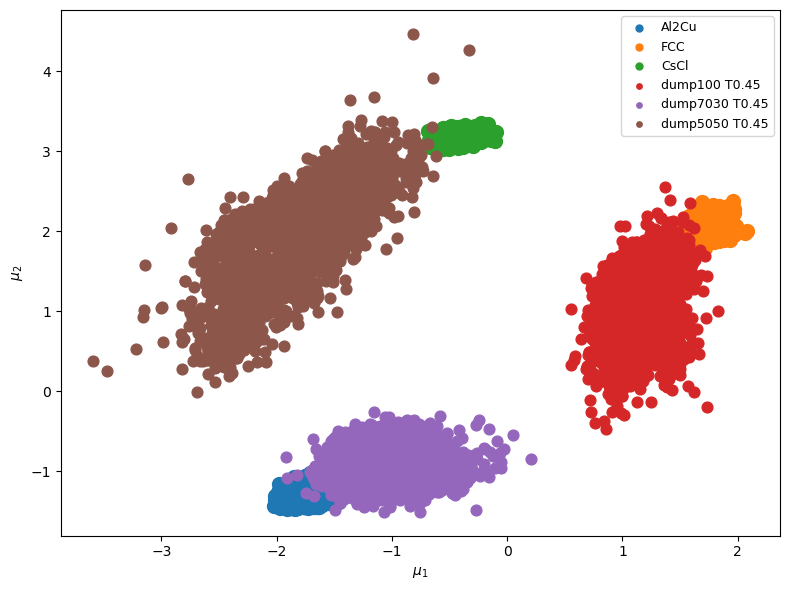

In [10]:
import matplotlib.pyplot as plt

# background (optional, can be slow if too many points)
# proj = tae_model.transform(scaled)
# plt.figure(figsize=(8, 6))
# plt.scatter(proj[::10, 0], proj[::10, 1], s=0.01, alpha=0.3)

plt.figure(figsize=(8, 6))

plt.scatter(test_proj_al2cu[:, 0],  test_proj_al2cu[:, 1],  s=100, alpha=1.0, label="Al2Cu")
plt.scatter(test_proj_fcc[:, 0],    test_proj_fcc[:, 1],    s=100, alpha=1.0, label="FCC")
#plt.scatter(test_proj_ni3p[:, 0],   test_proj_ni3p[:, 1],   s=100, alpha=1.0, label="Ni3P")

#plt.scatter(test_proj_fe3c[:, 0],   test_proj_fe3c[:, 1],   s=100, alpha=1.0, label="Fe3C")
#plt.scatter(test_proj_pubr3[:, 0],  test_proj_pubr3[:, 1],  s=100, alpha=1.0, label="PuBr3")
plt.scatter(test_proj_cscl[:, 0],   test_proj_cscl[:, 1],   s=100, alpha=1.0, label="CsCl")

plt.scatter(test_proj_d100[:, 0],   test_proj_d100[:, 1],   s=60,  alpha=1.0, label="dump100 T0.45")
#plt.scatter(test_proj_d6040[:, 0],  test_proj_d6040[:, 1],  s=60,  alpha=1.0, label="dump6040 T0.45")
plt.scatter(test_proj_d7030[:, 0],  test_proj_d7030[:, 1],  s=60,  alpha=1.0, label="dump7030 T0.45")
#plt.scatter(test_proj_d8020[:, 0],  test_proj_d8020[:, 1],  s=60,  alpha=1.0, label="dump8020 T0.45")
#plt.scatter(test_proj_d9010[:, 0],  test_proj_d9010[:, 1],  s=60,  alpha=1.0, label="dump9010 T0.45")
plt.scatter(test_proj_d5050[:, 0],  test_proj_d5050[:, 1],  s=60,  alpha=1.0, label="dump5050 T0.45")

plt.xlabel(r"$\mu_1$")
plt.ylabel(r"$\mu_2$")
plt.legend(markerscale=0.5, fontsize=9)
plt.tight_layout()
plt.show()
